# Original Paper
https://arxiv.org/pdf/1508.06576.pdf

layer names: https://www.robots.ox.ac.uk/~vgg/publications/2016/Mahendran16/mahendran16.pdf

# Install Keras

$pip install git+https://github.com/fchollet/keras.git

# Image preprocessing inputs

In [1]:
from PIL import Image
import numpy as np

# Load Images

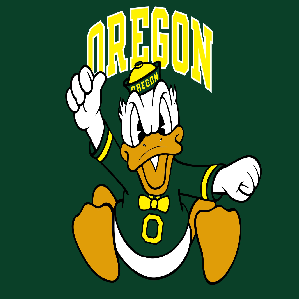

In [2]:
im = Image.open('duck.jpg')
im2 = im.resize([299,299])
style = np.array(im2).reshape((1,299,299,3))
im2

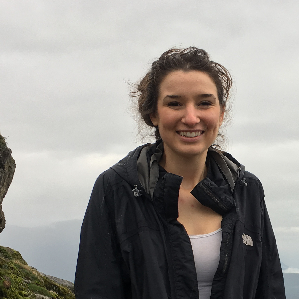

In [3]:
im = Image.open('IMG_8205.jpg')
im2 = im.crop(box=[700,100,2200,1700])
im2 = im2.resize([299,299])
alter = np.float32(np.array(im2).reshape([1,299,299,3]))
im2

# Keras imports

In [4]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, BatchNormalization, Activation, merge
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


# Build Keras model

In [5]:
input_shape=(None, None, 3)
input_tensor=Input(shape=input_shape)

In [6]:
img_input = Input(tensor=input_tensor, shape=input_shape)
x = Conv2D(32, 3, 3, subsample=(2, 2), bias=False, name='block1_conv1')(img_input)
x = BatchNormalization(name='block1_conv1_bn')(x)
x = Activation('relu', name='block1_conv1_act')(x)
x = Conv2D(64, 3, 3, bias=False, name='block1_conv2')(x)
x = BatchNormalization(name='block1_conv2_bn')(x)
x = Activation('relu', name='block1_conv2_act')(x)

residual = Conv2D(128, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv1')(x)
x = BatchNormalization(name='block2_sepconv1_bn')(x)
x = Activation('relu', name='block2_sepconv2_act')(x)
x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv2')(x)
x = BatchNormalization(name='block2_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block2_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(256, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block3_sepconv1_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv1')(x)
x = BatchNormalization(name='block3_sepconv1_bn')(x)
x = Activation('relu', name='block3_sepconv2_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv2')(x)
x = BatchNormalization(name='block3_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block3_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(728, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block4_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv1')(x)
x = BatchNormalization(name='block4_sepconv1_bn')(x)
x = Activation('relu', name='block4_sepconv2_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv2')(x)
x = BatchNormalization(name='block4_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block4_pool')(x)
x = merge([x, residual], mode='sum')

for i in range(8):
    residual = x
    prefix = 'block' + str(i + 5)

    x = Activation('relu', name=prefix + '_sepconv1_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv1')(x)
    x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv2_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv2')(x)
    x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv3_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv3')(x)
    x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

    x = merge([x, residual], mode='sum')

residual = Conv2D(1024, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block13_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block13_sepconv1')(x)
x = BatchNormalization(name='block13_sepconv1_bn')(x)
x = Activation('relu', name='block13_sepconv2_act')(x)
x = SeparableConv2D(1024, 3, 3, border_mode='same', bias=False, name='block13_sepconv2')(x)
x = BatchNormalization(name='block13_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block13_pool')(x)
x = merge([x, residual], mode='sum')

x = SeparableConv2D(1536, 3, 3, border_mode='same', bias=False, name='block14_sepconv1')(x)
x = BatchNormalization(name='block14_sepconv1_bn')(x)
x = Activation('relu', name='block14_sepconv1_act')(x)

x = SeparableConv2D(2048, 3, 3, border_mode='same', bias=False, name='block14_sepconv2')(x)
x = BatchNormalization(name='block14_sepconv2_bn')(x)
x = Activation('relu', name='block14_sepconv2_act')(x)

model = Model(img_input, x, name='xception')

#load weights
model.load_weights('/Users/tmulc/Desktop/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5')

# Train on the last layer

In [7]:
target = model.predict(style)

In [8]:
target.shape

(1, 10, 10, 2048)

# Create a new graph and add loss

https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html

In [9]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [10]:
ph = K.variable(alter)
ph_out = model(ph)
loss = K.sum(K.square(ph_out-target))
grad_op = K.gradients(loss,ph)

In [11]:
init = tf.initialize_all_variables()

In [12]:
sess.run(init)

In [13]:
derivates = sess.run(grad_op,feed_dict={K.learning_phase(): 1})[0]
derivates.shape

(1, 299, 299, 3)

WOOT WOOT! Now let's make adjustments to the image

In [14]:
step_size = 10

In [15]:
alter = alter-step_size*derivates

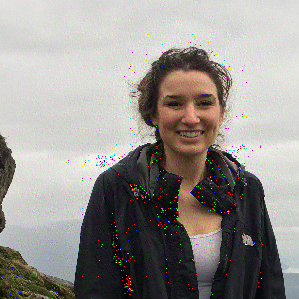

In [16]:
Image.fromarray(np.uint8(alter.reshape(299,299,3)))

# training loop

In [17]:
ph_in = K.placeholder(shape=(1,299,299,3))
ph = K.variable(ph_in)
ph_out = model(ph)
loss = K.sum(K.square(ph_out-target))
grad_op = K.gradients(loss,ph)

In [18]:
init = tf.initialize_all_variables()

In [19]:
train_iter=0

In [20]:
step_size = 5
num_steps = 100
for i in range(num_steps):
    sess.run([init],feed_dict={ph_in:alter})
    derivates = sess.run(grad_op,feed_dict={K.learning_phase(): 1})[0]
    alter = alter-step_size*derivates
    
    #save the image every 20 steps
    if i % 20 == 0:
        train_iter+=1
        Image.fromarray(np.uint8(alter.reshape(299,299,3))).save('Dreams/dream_'+str(train_iter)+'.jpg')

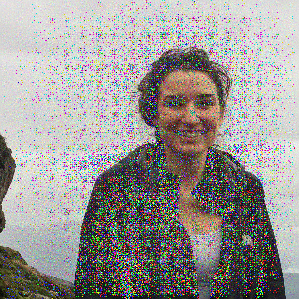

In [21]:
Image.fromarray(np.uint8(alter.reshape(299,299,3)))

# Content

In [32]:
del x
del alter

In [35]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

In [1]:
from PIL import Image
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Input, BatchNormalization, Activation, merge
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


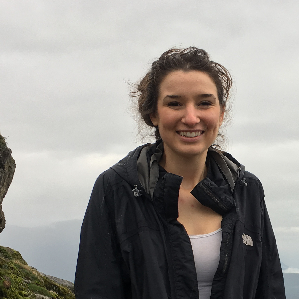

In [16]:
im = Image.open('duck.jpg')
im2 = im.resize([299,299])
style = np.array(im2).reshape((1,299,299,3))
im2

im = Image.open('IMG_8205.jpg')
im2 = im.crop(box=[700,100,2200,1700])
im2 = im2.resize([299,299])
alter = np.float32(np.array(im2).reshape([1,299,299,3]))
im2

In [3]:
input_shape=(None, None, 3)
input_tensor=Input(shape=input_shape)
img_input = Input(tensor=input_tensor, shape=input_shape)
x1 = Conv2D(32, 3, 3, subsample=(2, 2), bias=False, name='block1_conv1')(img_input)
x = x1
x = BatchNormalization(name='block1_conv1_bn')(x)
x = Activation('relu', name='block1_conv1_act')(x)
x = Conv2D(64, 3, 3, bias=False, name='block1_conv2')(x)
x = BatchNormalization(name='block1_conv2_bn')(x)
x = Activation('relu', name='block1_conv2_act')(x)

residual = Conv2D(128, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv1')(x)
x = BatchNormalization(name='block2_sepconv1_bn')(x)
x = Activation('relu', name='block2_sepconv2_act')(x)
x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv2')(x)
x = BatchNormalization(name='block2_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block2_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(256, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block3_sepconv1_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv1')(x)
x = BatchNormalization(name='block3_sepconv1_bn')(x)
x = Activation('relu', name='block3_sepconv2_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv2')(x)
x = BatchNormalization(name='block3_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block3_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(728, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block4_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv1')(x)
x = BatchNormalization(name='block4_sepconv1_bn')(x)
x = Activation('relu', name='block4_sepconv2_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv2')(x)
x = BatchNormalization(name='block4_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block4_pool')(x)
x = merge([x, residual], mode='sum')

for i in range(8):
    residual = x
    prefix = 'block' + str(i + 5)

    x = Activation('relu', name=prefix + '_sepconv1_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv1')(x)
    x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv2_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv2')(x)
    x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv3_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv3')(x)
    x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

    x = merge([x, residual], mode='sum')

residual = Conv2D(1024, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block13_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block13_sepconv1')(x)
x = BatchNormalization(name='block13_sepconv1_bn')(x)
x = Activation('relu', name='block13_sepconv2_act')(x)
x = SeparableConv2D(1024, 3, 3, border_mode='same', bias=False, name='block13_sepconv2')(x)
x = BatchNormalization(name='block13_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block13_pool')(x)
x = merge([x, residual], mode='sum')

x = SeparableConv2D(1536, 3, 3, border_mode='same', bias=False, name='block14_sepconv1')(x)
x = BatchNormalization(name='block14_sepconv1_bn')(x)
x = Activation('relu', name='block14_sepconv1_act')(x)

x = SeparableConv2D(2048, 3, 3, border_mode='same', bias=False, name='block14_sepconv2')(x)
x = BatchNormalization(name='block14_sepconv2_bn')(x)
x = Activation('relu', name='block14_sepconv2_act')(x)

model = Model(img_input, [x1,x], name='xception')

#load weights
model.load_weights('xception_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [4]:
target = model.predict(style)
print target[0].shape,target[1].shape

(1, 149, 149, 32) (1, 10, 10, 2048)


In [5]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [6]:
ph_in = K.placeholder(shape=(1,299,299,3))
ph = K.variable(ph_in)
ph_out = model(ph)
loss = K.sum(K.square(ph_out[0]-target[0]))
grad_op = K.gradients(loss,ph)

In [7]:
init = tf.initialize_all_variables()

In [8]:
train_iter=0

In [9]:
alter.dtype

dtype('float32')

In [10]:
alter.shape

(1, 299, 299, 3)

In [67]:
step_size = .005
num_steps = 100
for i in range(num_steps):
    sess.run([init],feed_dict={ph_in:alter})
    derivates = sess.run(grad_op,feed_dict={K.learning_phase(): 1})[0]
    alter = alter-step_size*derivates
    
    #save the image every 20 steps
    if i % 20 == 0:
        train_iter+=1
        Image.fromarray(np.uint8(alter.reshape(299,299,3))).save('DreamStyle//dream_'+str(train_iter)+'.jpg')

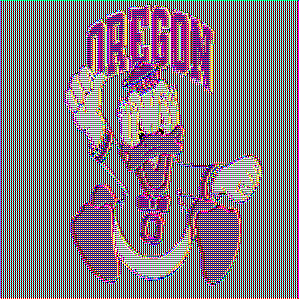

In [68]:
Image.fromarray(np.uint8(alter.reshape(299,299,3)))

# Content 2

In [1]:
from PIL import Image
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Input, BatchNormalization, Activation, merge
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D

Using TensorFlow backend.


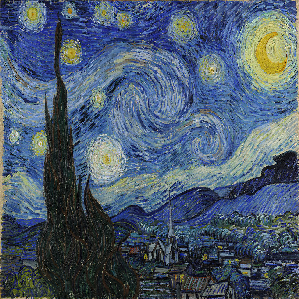

In [2]:
im = Image.open('starry_night.jpg')
im2 = im.resize([299,299])
style = np.array(im2).reshape((1,299,299,3))
im2

In [3]:
im = Image.open('IMG_8205.jpg')
im2 = im.crop(box=[700,100,2200,1700])
im2 = im2.resize([299,299])
alter = np.float32(np.array(im2).reshape([1,299,299,3]))

In [4]:
input_shape=(None, None, 3)
input_tensor=Input(shape=input_shape)
img_input = Input(tensor=input_tensor, shape=input_shape)
x = Conv2D(32, 3, 3, subsample=(2, 2), bias=False, name='block1_conv1')(img_input)
x = BatchNormalization(name='block1_conv1_bn')(x)
x = Activation('relu', name='block1_conv1_act')(x)
x = Conv2D(64, 3, 3, bias=False, name='block1_conv2')(x)
x = BatchNormalization(name='block1_conv2_bn')(x)
x = Activation('relu', name='block1_conv2_act')(x)

residual = Conv2D(128, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv1')(x)
x = BatchNormalization(name='block2_sepconv1_bn')(x)
x = Activation('relu', name='block2_sepconv2_act')(x)
x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv2')(x)
x1 = BatchNormalization(name='block2_sepconv2_bn')(x)
x = x1

x = AveragePooling2D((3, 3), strides=(2, 2), border_mode='same', name='block2_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(256, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block3_sepconv1_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv1')(x)
x = BatchNormalization(name='block3_sepconv1_bn')(x)
x = Activation('relu', name='block3_sepconv2_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv2')(x)
x = BatchNormalization(name='block3_sepconv2_bn')(x)

x = AveragePooling2D((3, 3), strides=(2, 2), border_mode='same', name='block3_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(728, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block4_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv1')(x)
x = BatchNormalization(name='block4_sepconv1_bn')(x)
x = Activation('relu', name='block4_sepconv2_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv2')(x)
x = BatchNormalization(name='block4_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block4_pool')(x)
x2 = merge([x, residual], mode='sum')
x = x2

for i in range(8):
    residual = x
    prefix = 'block' + str(i + 5)

    x = Activation('relu', name=prefix + '_sepconv1_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv1')(x)
    x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv2_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv2')(x)
    x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv3_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv3')(x)
    x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

    x = merge([x, residual], mode='sum')

residual = Conv2D(1024, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block13_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block13_sepconv1')(x)
x = BatchNormalization(name='block13_sepconv1_bn')(x)
x = Activation('relu', name='block13_sepconv2_act')(x)
x = SeparableConv2D(1024, 3, 3, border_mode='same', bias=False, name='block13_sepconv2')(x)
x = BatchNormalization(name='block13_sepconv2_bn')(x)

x = AveragePooling2D((3, 3), strides=(2, 2), border_mode='same', name='block13_pool')(x)
x3 = merge([x, residual], mode='sum')
x = x3

x = SeparableConv2D(1536, 3, 3, border_mode='same', bias=False, name='block14_sepconv1')(x)
x = BatchNormalization(name='block14_sepconv1_bn')(x)
x = Activation('relu', name='block14_sepconv1_act')(x)

x = SeparableConv2D(2048, 3, 3, border_mode='same', bias=False, name='block14_sepconv2')(x)
x = BatchNormalization(name='block14_sepconv2_bn')(x)
x = Activation('relu', name='block14_sepconv2_act')(x)

model = Model(img_input, [x1,x2,x3,x], name='xception')

#load weights
model.load_weights('xception_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [5]:
target = model.predict(style)
print target[0].shape,target[1].shape

(1, 147, 147, 128) (1, 19, 19, 728)


In [7]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [8]:
ph_in = K.placeholder(shape=(1,299,299,3))
ph = K.variable(ph_in)
ph_out = model(ph)
ph_out1,ph_out2,ph_out3,ph_out4 = K.relu(ph_out[0]),K.relu(ph_out[1]),K.relu(ph_out[2]),K.relu(ph_out[3])
loss = 0.5*(K.sum(K.square(ph_out1-target[0]))+
            K.sum(K.square(ph_out2-target[1]))+
            K.sum(K.square(ph_out3-target[2]))+
            K.sum(K.square(ph_out4-target[3])))
#grads = K.gradients(loss,ph)
#grad_op = K.relu(grads)
grad_op = K.gradients(loss,ph)

In [9]:
init = tf.initialize_all_variables()

In [10]:
train_iter=0

In [11]:
step_size = .05
num_steps = 500
for i in range(num_steps):
    sess.run([init],feed_dict={ph_in:alter})
    derivates = sess.run(grad_op,feed_dict={K.learning_phase(): 1})[0]
    alter = alter-step_size*derivates
    
    #save the image every 20 steps
    if i % 20 == 0:
        train_iter+=1
        Image.fromarray(np.uint8(alter.reshape(299,299,3))).save('DreamStyle2/dream_'+str(train_iter)+'.jpg')

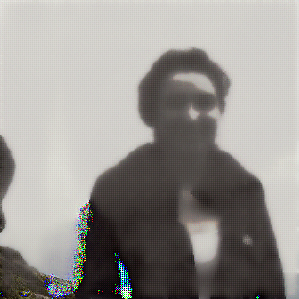

In [12]:
Image.fromarray(np.uint8(alter.reshape(299,299,3)))

# White noise image

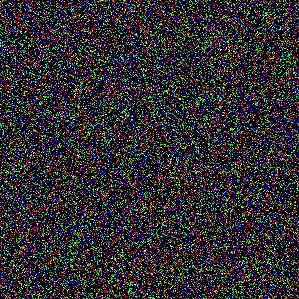

In [41]:
wn = np.random.randn(1,299,299,3)
Image.fromarray(np.uint8(wn.reshape(299,299,3)))

# Content Reconstruction

Need to compute the gram matrix using texture

In [42]:
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
train_iter=0

In [44]:
losses = []

In [45]:
step_size = 1
num_steps = 500
for i in tqdm(range(num_steps)):
    sess.run([init],feed_dict={ph_in:wn})
    l,derivates = sess.run([loss,grad_op],feed_dict={K.learning_phase(): 1})
    wn = wn-step_size*derivates[0]
    losses.append(l)
    
    #save the image every 20 steps
    if i % 20 == 0:
        train_iter+=1
        Image.fromarray(np.uint8(wn.reshape(299,299,3))).save('DreamStyle2/dream_'+str(train_iter)+'.jpg')

100%|██████████| 500/500 [11:48<00:00,  1.48s/it]


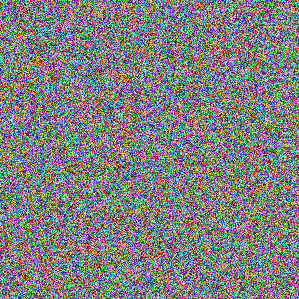

In [46]:
Image.fromarray(np.uint8(wn.reshape(299,299,3)))

In [ ]:
derivates